# Initial Data Exploration

In [1]:
import pandas as pd

# Load datasets
movies_df = pd.read_csv("movies.csv")
shows_df = pd.read_csv("shows.csv")

# Inspect datasets
movies_df.info()
shows_df.info()
movies_df.describe(include='all')
shows_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126752 entries, 0 to 1126751
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1126752 non-null  int64  
 1   title                 1126739 non-null  object 
 2   vote_average          1126752 non-null  float64
 3   vote_count            1126752 non-null  int64  
 4   status                1126752 non-null  object 
 5   release_date          944023 non-null   object 
 6   revenue               1126752 non-null  int64  
 7   runtime               1126752 non-null  int64  
 8   adult                 1126752 non-null  bool   
 9   backdrop_path         299847 non-null   object 
 10  budget                1126752 non-null  int64  
 11  homepage              119520 non-null   object 
 12  imdb_id               600111 non-null   object 
 13  original_language     1126752 non-null  object 
 14  original_title        1126739 non-

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
count,168639.000000,168634,168639.000000,168639.000000,168639,168639.000000,168639.000000,93333,168639,77780,...,5330,99713,36496,110050,97589,137609,109280,59342,77511,168639.000000
unique,NaN,155586,NaN,NaN,106,NaN,NaN,91243,2,76300,...,5267,2228,26081,1113,8196,792,946,27132,1247,NaN
top,NaN,二十四孝动画全集,NaN,NaN,en,NaN,NaN,Thai Drama 2019.,False,/rYLnnA0GBXATn8kMXCNY0r8mA8Q.jpg,...,drama,Documentary,Shotaro Ishinomori,en,BBC One,US,English,TVB,Japan,NaN
freq,NaN,24,NaN,NaN,76304,NaN,NaN,27,166600,12,...,4,17596,107,38671,2103,28759,39251,1356,9682,NaN
mean,111307.074704,NaN,1.548497,24.465082,NaN,13.305054,2.333843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.603348
std,76451.662352,NaN,2.942872,134.799622,NaN,190.809059,3.454334,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.950427
min,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,45936.500000,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,97734.000000,NaN,1.000000,6.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,196923.500000,NaN,1.000000,20.000000,NaN,1.000000,6.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000


In [2]:
# Check missing values
movies_df.isnull().mean().sort_values(ascending=False)
shows_df.isnull().mean().sort_values(ascending=False)

,0
tagline,0.968394
created_by,0.783585
homepage,0.697591
production_companies,0.648112
production_countries,0.540373
backdrop_path,0.538778
overview,0.446552
networks,0.421314
genres,0.408719
poster_path,0.355208


## Analysis of Missing Values
### 1. Release Dates (Movies and Shows)

- Movies: Missing release_date values can either be left as "unknown" or filled with the median date (or another appropriate statistic). If you plan to convert dates to year-based categories or a period encoding, consider setting a placeholder like "unknown" or assigning them to a broad period category.

- Shows: For first_air_date and last_air_date, a similar strategy can be used, as these are essential for analyzing trends over time.

### 2. Text Fields (Overview, Tagline, Keywords)

- For both datasets, missing text fields (e.g., overview, tagline, keywords) can be filled with empty strings (''). This approach avoids introducing unintended information, and the models (TF-IDF or BERT) will handle empty entries effectively.

### 3. Categorical Fields (Genres)

- For missing genres, filling them with a zero across all one-hot encoded genre features is a sensible approach, as it represents the absence of a genre association. This can help avoid any misleading association with specific genres.

### 4. Production Information (Production Companies, Countries, etc.)

- Missing entries in fields related to production (production_companies, production_countries, spoken_languages, etc.) can be left as blanks or empty lists. These entries provide useful but non-essential metadata, so leaving them blank is unlikely to impact the core analysis significantly.

### 5. Additional Attributes (Shows-Specific)

- Missing entries for created_by, networks, origin_country, and languages in the shows dataset can also be treated as blanks, similar to the production information fields. These attributes may not be core drivers for the model but could add some contextual depth.

# Understanding Feature Distributions

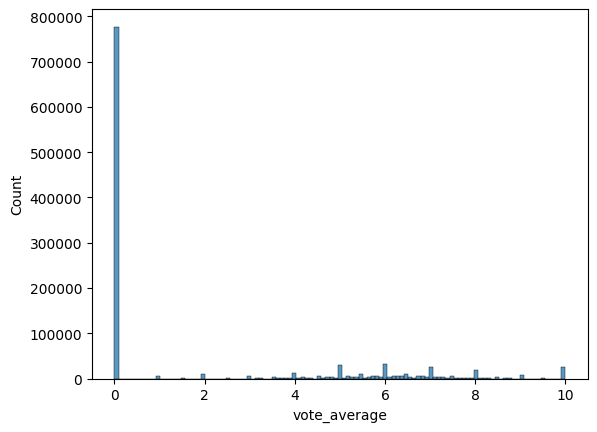

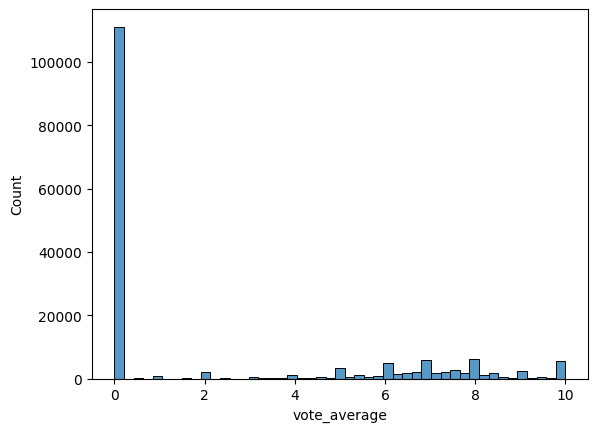

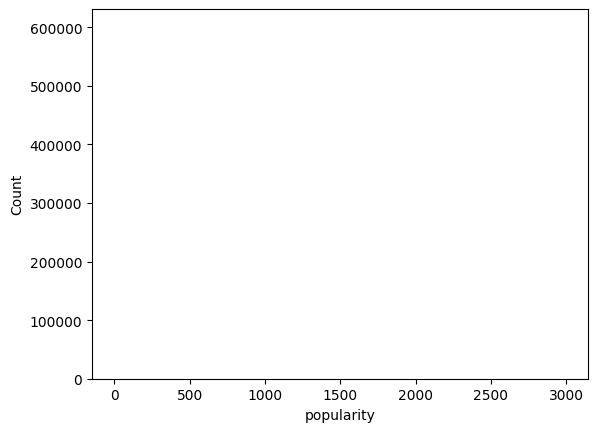

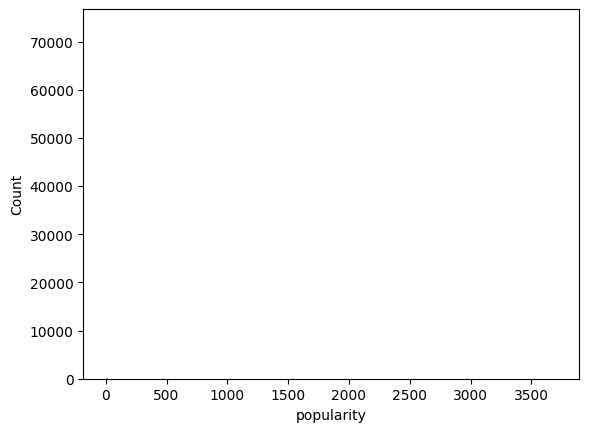

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
sns.histplot(movies_df['vote_average'], kde=False)
plt.show()
sns.histplot(shows_df['vote_average'], kde=False)
plt.show()
sns.histplot(movies_df['popularity'], kde=False)
plt.show()
sns.histplot(shows_df['popularity'], kde=False)
plt.show()

## Key Observations

### 1. vote_average Distribution:

- Many movies and shows have a vote_average of 0, indicating they are unrated.
Keeping the vote_average as 0 for these entries is reasonable, as it reflects that these items are less popular or have limited viewer engagement.

- Changing these to a median or other value might misrepresent them, artificially suggesting they have a level of quality or popularity that doesn’t exist.

### 2. Interpretation of Unrated Content:

- A vote_average of 0 helps signify content with little to no user interest.

- This approach allows the recommendation system to prioritize rated, more popular content, aligning with general user preferences.

### 3. Future Considerations:

- Further exploration of related features (vote_count and popularity) will help confirm that a vote_average of 0 correlates with low vote_count and lower popularity, solidifying this interpretation.

- If needed in the recommendation pipeline, smoothing techniques could be applied to ensure unrated items aren’t overly penalized in recommendation results.

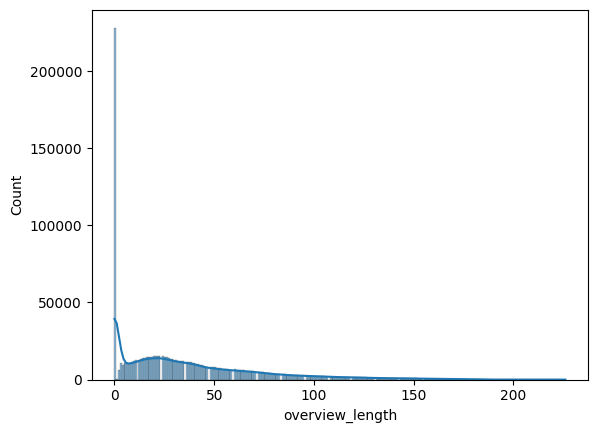

In [4]:
movies_df['overview_length'] = movies_df['overview'].fillna('').apply(lambda x: len(x.split()))
sns.histplot(movies_df['overview_length'], kde=True)
plt.show()

# Exploring Feature Relevance and Correlations

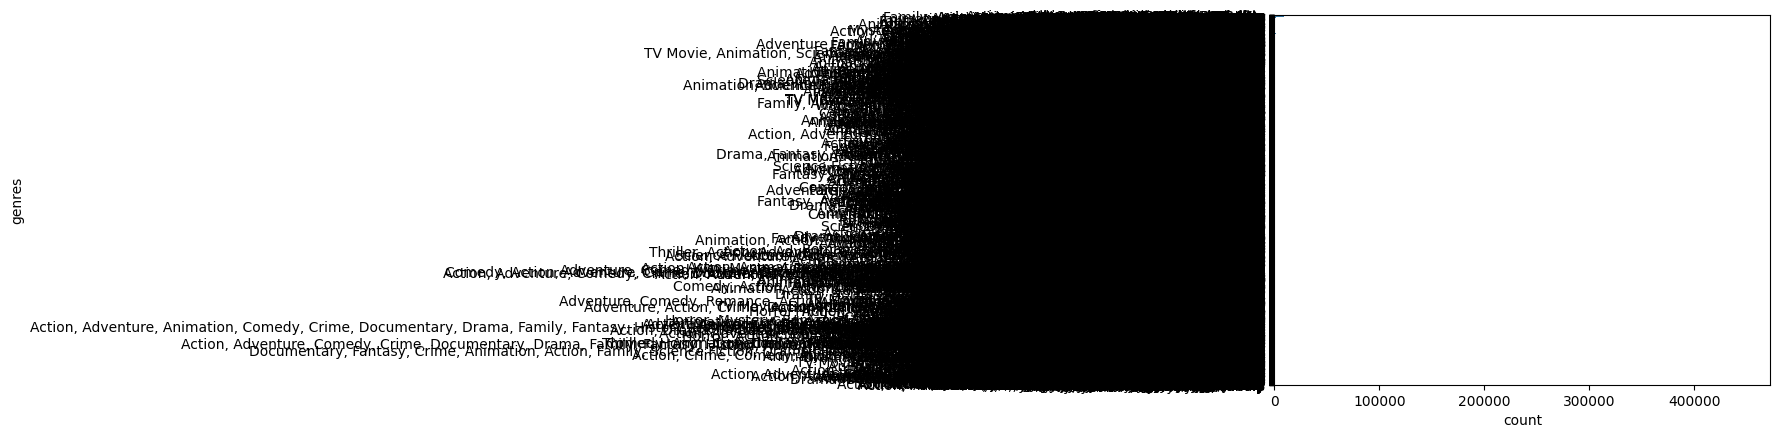

In [6]:
# Genre distribution example
genres = movies_df['genres'].fillna('').str.split('|').explode()  # Assuming genres are '|' separated
sns.countplot(y=genres)
plt.show()

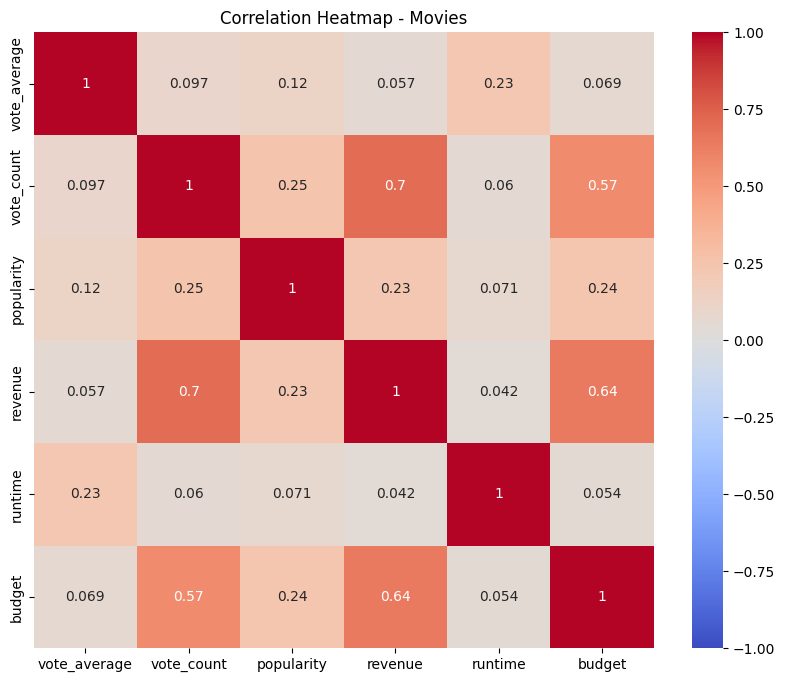

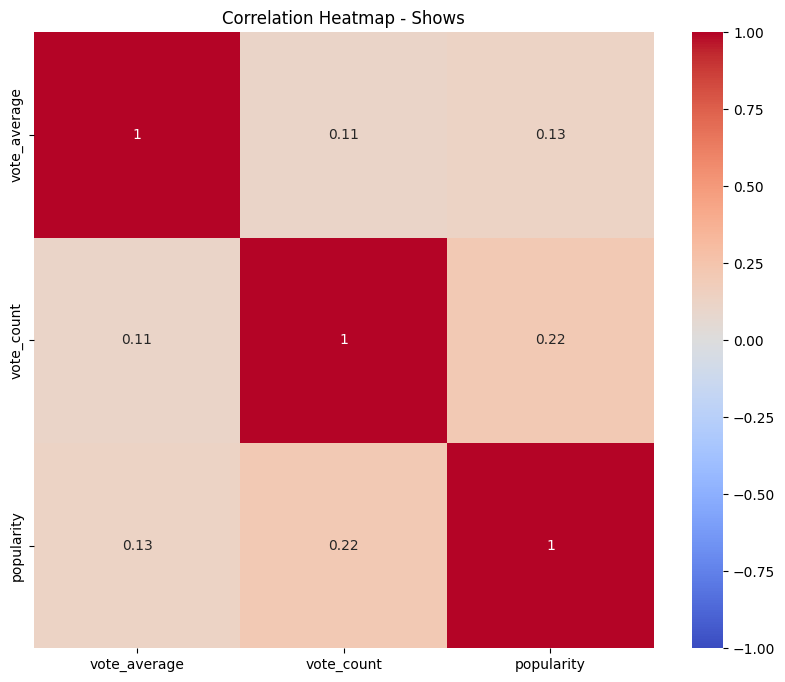

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis
movies_numerical_features = ["vote_average", "vote_count", "popularity", "revenue", "runtime", "budget"]
shows_numerical_features = ["vote_average", "vote_count", "popularity"]
movies_corr = movies_df[movies_numerical_features].corr()
shows_corr = shows_df[shows_numerical_features].corr()

# Plot correlation heatmap for movies
plt.figure(figsize=(10, 8))
sns.heatmap(movies_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Movies")
plt.show()

# Plot correlation heatmap for shows
plt.figure(figsize=(10, 8))
sns.heatmap(shows_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Shows")
plt.show()

## Insights

- **vote_average and vote_count**: The correlation between vote_average and vote_count is 0.097, indicating a very weak positive relationship. This means that the average rating of a movie is not strongly related to the number of votes it receives, implying that high ratings do not necessarily attract more audience interaction.

- **vote_count and revenue**: With a correlation of 0.7, there’s a strong positive relationship between vote_count and revenue. This suggests that movies with more votes tend to generate higher revenue, likely because they reach a larger audience, which drives both engagement and sales.

- **vote_count and budget**: The correlation between vote_count and budget is 0.57, indicating a moderate positive relationship. Higher-budget movies may have wider releases and larger marketing efforts, leading to more votes from a larger audience.

- **popularity and other features**:

  - *popularity and vote_count*: The correlation here is 0.25, a weak positive relationship. This implies that more popular movies generally have higher vote counts, though other factors likely influence popularity beyond vote count.
  - *popularity and revenue*: With a correlation of 0.23, there’s a weak relationship, suggesting that while popular movies may generate more revenue, popularity alone is not a strong predictor of financial success.

- **revenue and budget**: The correlation between revenue and budget is 0.64, a strong positive relationship. Higher-budget movies generally have higher revenue, likely due to better production quality, broader distribution, and stronger marketing. However, budget alone doesn’t guarantee success, as there is still room for variability.

- **runtime correlations**:

  - *runtime and vote_average*: With a correlation of 0.23, there’s a weak positive relationship, suggesting that longer movies might slightly favor better ratings, possibly because they offer more depth in storytelling.

  - *runtime and budget*: With a very weak correlation of 0.054, runtime has little to no relationship with budget, implying that budget doesn’t necessarily affect how long a movie is.

Combining features like vote_count, budget, and revenue into a single metric could be a useful approach, especially since these features show stronger correlations with each other and may collectively capture a sense of a movie's popularity and financial success.

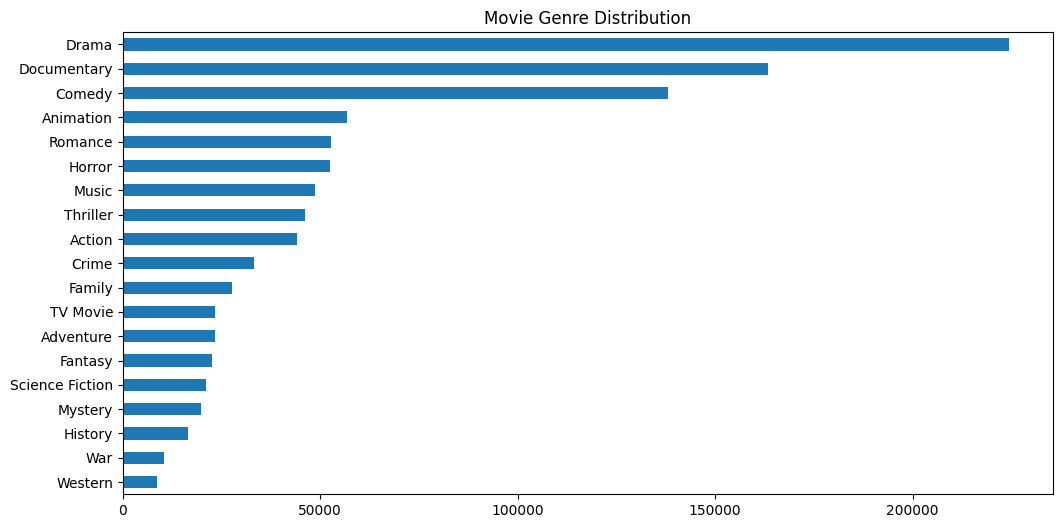

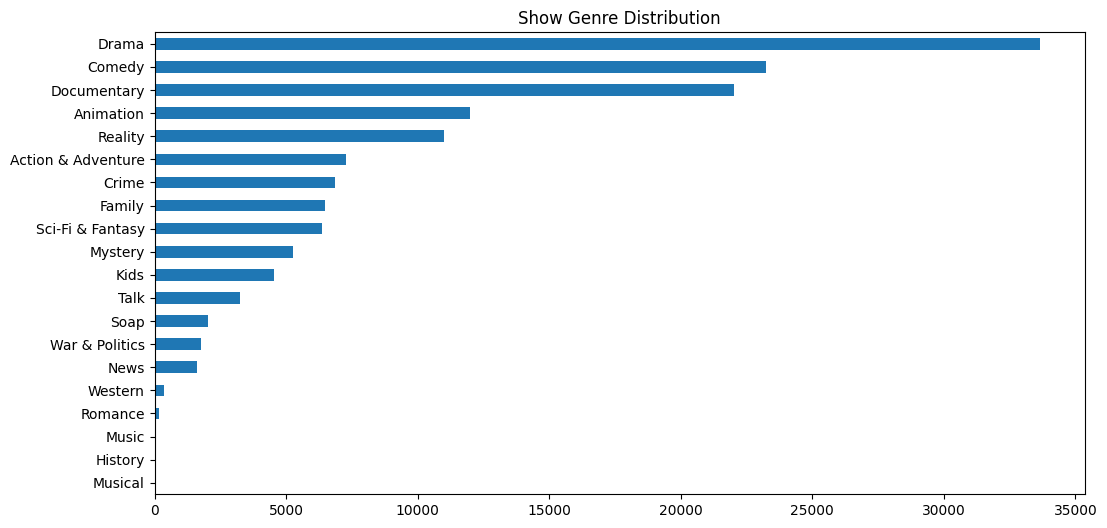

In [14]:
import ast
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Improved genre extraction function
def extract_genres(data):
    genre_counts = Counter()

    for item in data.dropna():
        try:
            # Attempt to parse as a list using literal_eval
            genres = ast.literal_eval(item)
            if isinstance(genres, list):
                genre_counts.update(genres)
        except (ValueError, SyntaxError):
            # If not a list, assume it's a comma-separated string
            genres = item.split(', ')
            genre_counts.update(genres)

    return pd.Series(genre_counts)

# Apply the function
movie_genre_counts = extract_genres(movies_df['genres'])
show_genre_counts = extract_genres(shows_df['genres'])

# Plot genre distributions for movies
plt.figure(figsize=(12, 6))
movie_genre_counts.sort_values().plot(kind='barh', title="Movie Genre Distribution")
plt.show()

# Plot genre distributions for shows
plt.figure(figsize=(12, 6))
show_genre_counts.sort_values().plot(kind='barh', title="Show Genre Distribution")
plt.show()

The genre distribution analysis indicates that Drama, Documentary, and Comedy are the most popular movie genres, followed by Animation and Romance. This trend suggests potential biases that could impact the recommendation algorithm's structure.

Key suggestions for leveraging this genre distribution in the recommendation system include:

- Feature Engineering: Utilize genre popularity as a feature, either by emphasizing popular genres or downweighting them to focus on niche recommendations.

- User Personalization: Develop a "genre affinity" feature that integrates user viewing history with genre popularity to better match users with genres they might enjoy.

- Content-Based Filtering: Since popular genres are more frequent, implement strategies to prevent repetitive recommendations. Consider adding features that reflect a user's history with less common genres for diversification.

- Genre Binning: To address the over-representation of popular genres, group them or highlight underrepresented genres to enhance recommendation diversity.

- Cross-Media Insights: If show genre distributions align with those of movies, explore cross-recommendations, such as suggesting documentary series to users who frequently watch documentary films.

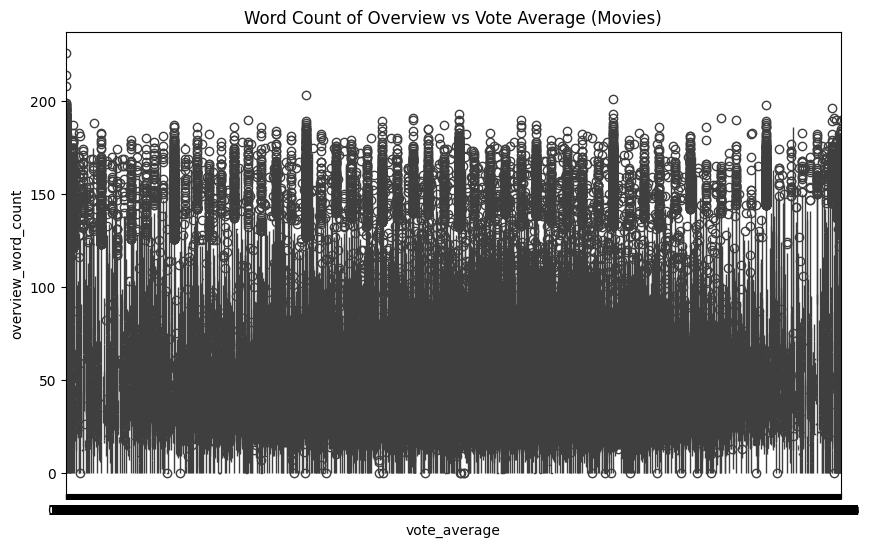

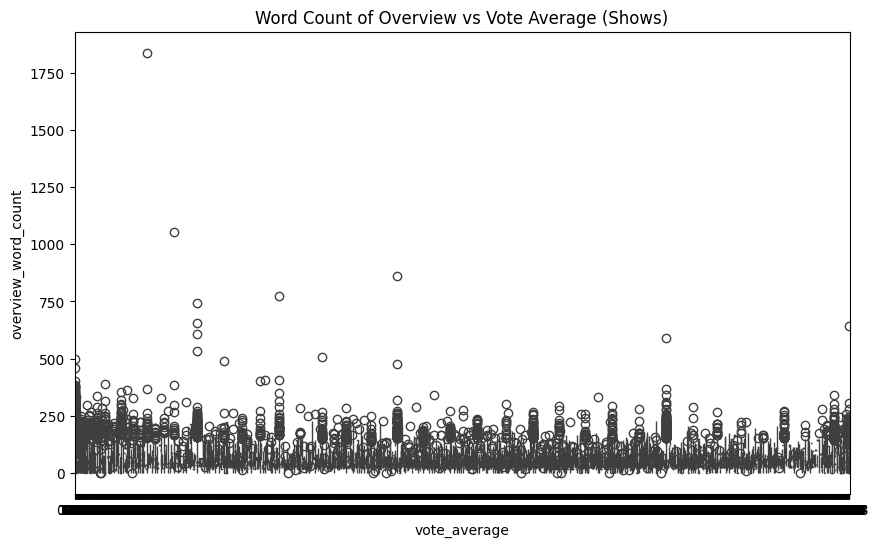

In [15]:
# Calculate word counts for 'overview', 'tagline', and 'keywords'
movies_df['overview_word_count'] = movies_df['overview'].fillna('').apply(lambda x: len(x.split()))
shows_df['overview_word_count'] = shows_df['overview'].fillna('').apply(lambda x: len(x.split()))

# Compare with vote_average or popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x='vote_average', y='overview_word_count', data=movies_df)
plt.title("Word Count of Overview vs Vote Average (Movies)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='vote_average', y='overview_word_count', data=shows_df)
plt.title("Word Count of Overview vs Vote Average (Shows)")
plt.show()

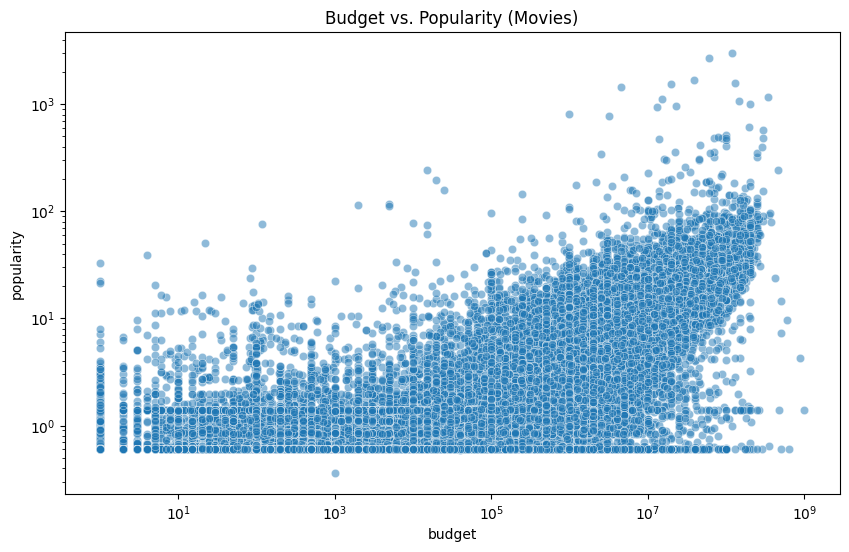

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='popularity', data=movies_df, alpha=0.5)
plt.title("Budget vs. Popularity (Movies)")
plt.xscale('log')
plt.yscale('log')
plt.show()